In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import roc_auc_score, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = train.copy()

In [70]:
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,-0.51_29.29
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,-0.51_29.29
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,-0.51_29.29
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,-0.51_29.29
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,-0.51_29.29


In [71]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,location
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583,-0.51_29.29
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380,-0.51_29.29
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361,-0.51_29.29
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774,-0.51_29.29
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807,-0.51_29.29


In [5]:
data.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

In [6]:
data.dropna()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
155,ID_-0.510_29.290_2021_49,-0.510,29.290,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,...,5019.467594,66195.733910,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898
451,ID_-0.547_29.653_2021_27,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,...,3786.135092,73589.759158,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903
453,ID_-0.547_29.653_2021_29,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,...,3227.241991,77346.158934,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023
474,ID_-0.547_29.653_2021_50,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,...,6069.286554,56446.041636,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269
1112,ID_-0.615_30.885_2021_52,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,...,4901.979810,65507.318464,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78045,ID_-3.136_30.364_2021_29,-3.136,30.364,2021,29,-0.000041,0.560384,-0.000017,0.028559,4.671381,...,3276.807608,75745.985749,2397.274872,6.929006,0.189645,-30.680727,53.829194,-38.467197,32.124882,15.915551
78203,ID_-3.138_30.662_2021_28,-3.138,30.662,2021,28,-0.000296,0.582466,-0.000162,0.083189,74.629140,...,4787.405410,66259.879395,3789.424594,6.820494,0.179993,-41.721972,36.694905,-41.679800,33.989014,22.860306
78205,ID_-3.138_30.662_2021_30,-3.138,30.662,2021,30,-0.000177,0.636178,-0.000094,0.085995,-50.365193,...,3448.748725,74489.621613,2596.923233,5.897749,0.177577,-13.445917,47.642659,-38.895209,29.898948,22.815990
78216,ID_-3.138_30.662_2021_41,-3.138,30.662,2021,41,0.000056,0.694221,0.000039,0.000000,75.047003,...,6428.729028,54486.457256,5428.729056,9.640017,0.233593,-13.485498,43.845330,-102.903782,25.609043,25.353760


In [7]:
data.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

In [8]:
data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [9]:
data['location'] = [str(x) + '_' + str(y) for x, y in zip(data.latitude, data.longitude)]

In [10]:
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,-0.51_29.29
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,-0.51_29.29
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,-0.51_29.29
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,-0.51_29.29
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,-0.51_29.29


In [14]:
sample = data[data.location == "-0.51_29.29"]
sample_rolling_mean = sample["SulphurDioxide_SO2_column_number_density"].rolling(window = 2).mean()

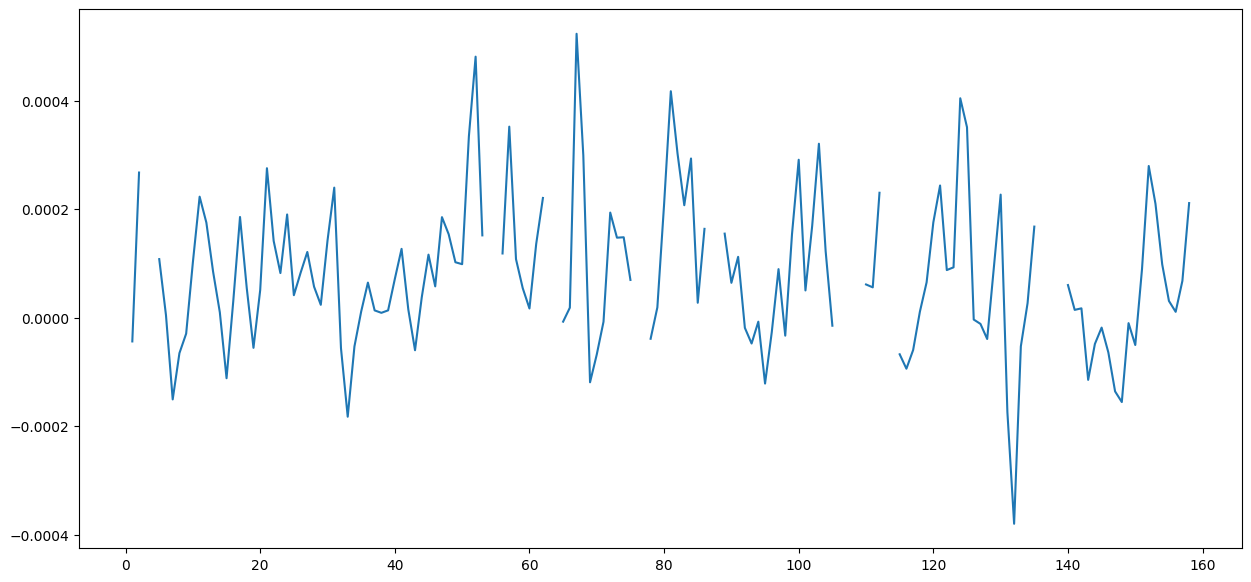

In [15]:
plt.figure(figsize = (15, 7))
sample_rolling_mean.plot()
#plt.xlabel("")plt.ylabel("")
plt.show()

In [17]:
sample = data[data.location == "-0.51_29.29"]
sample_rolling_mean = sample["SulphurDioxide_SO2_column_number_density_amf"].rolling(window = 2).mean()

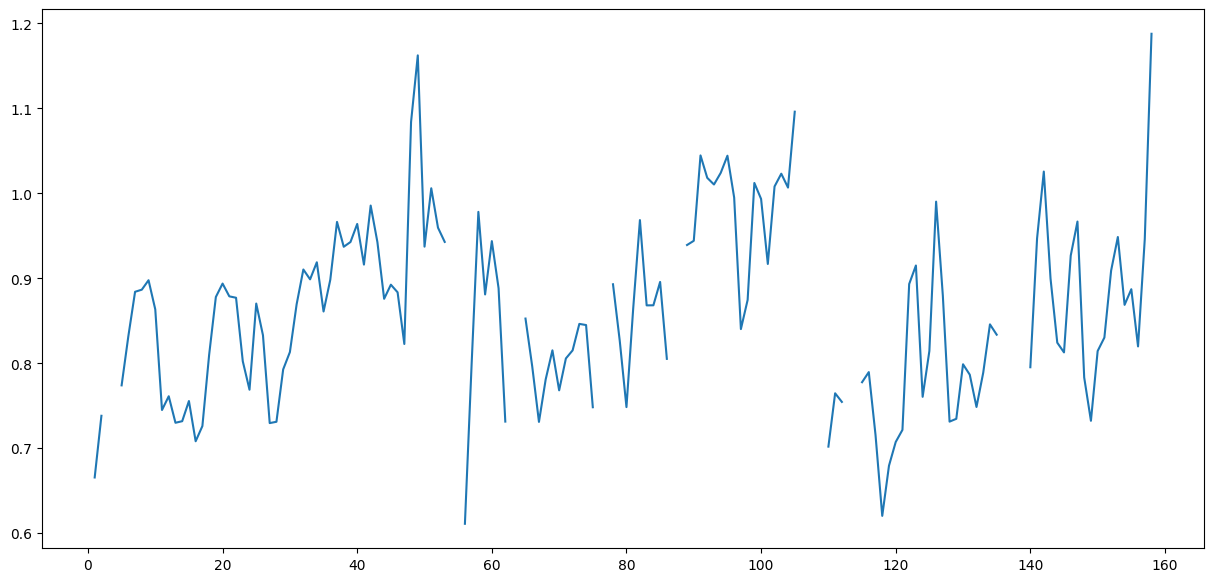

In [19]:
plt.figure(figsize = (15, 7))
sample_rolling_mean.plot()
#plt.xlabel("")plt.ylabel("")
plt.show()

In [22]:
data_rolling_mean = data.sort_values(by = ["location",
                                          "year",
                                          "week_no"]).groupby(["location"])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
data_rolling_mean.drop(["level_1", "emission", "location"], axis = 1, inplace = True)
data_rolling_mean.columns = [col + "_rolling_mean" for col in data_rolling_mean.columns]


test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test["location"] = [str(x) + "_" + str(y) for x, y in zip(test.latitude, test.longitude)]
test_rolling_mean = test.sort_values(by = ["location",
                                          "year",
                                          "week_no"]).groupby(["location"])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_rolling_mean.drop(["level_1", "location"], axis = 1, inplace = True)
test_rolling_mean.columns = [col + "_rolling_mean" for col in test_rolling_mean.columns]

In [23]:
data_engnd_feats = data.sort_values(by = ["location",
                                      "year",
                                      "week_no"],
                                ignore_index = True).merge(data_rolling_mean,
                                                           how = "left",
                                                           left_index = True,
                                                           right_index = True)
                                
test_engnd_feats = test.sort_values(by = ["location",
                                      "year",
                                      "week_no"],
                                ignore_index = True).merge(test_rolling_mean,
                                                           how = "left",
                                                           left_index = True,
                                                           right_index = True)

In [54]:
X = data_engnd_feats.drop(["ID_LAT_LON_YEAR_WEEK", "location", "emission"], axis = 1)
X = X.fillna(X.median())
y = data_engnd_feats.emission

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.31, random_state = 21)

In [60]:
X_train.shape

(54525, 144)

In [61]:
%%time
xgb_reg = XGBRegressor(random_state = 21)
xgb_reg.fit(X_train, y_train)
prediction = xgb_reg.predict(X_test)

CPU times: total: 4min 25s
Wall time: 1min 44s


In [66]:
mse = root_mean_squared_error(y_test, prediction)
"MSE: ",  {mse}

('MSE: ', {23.501686994540005})

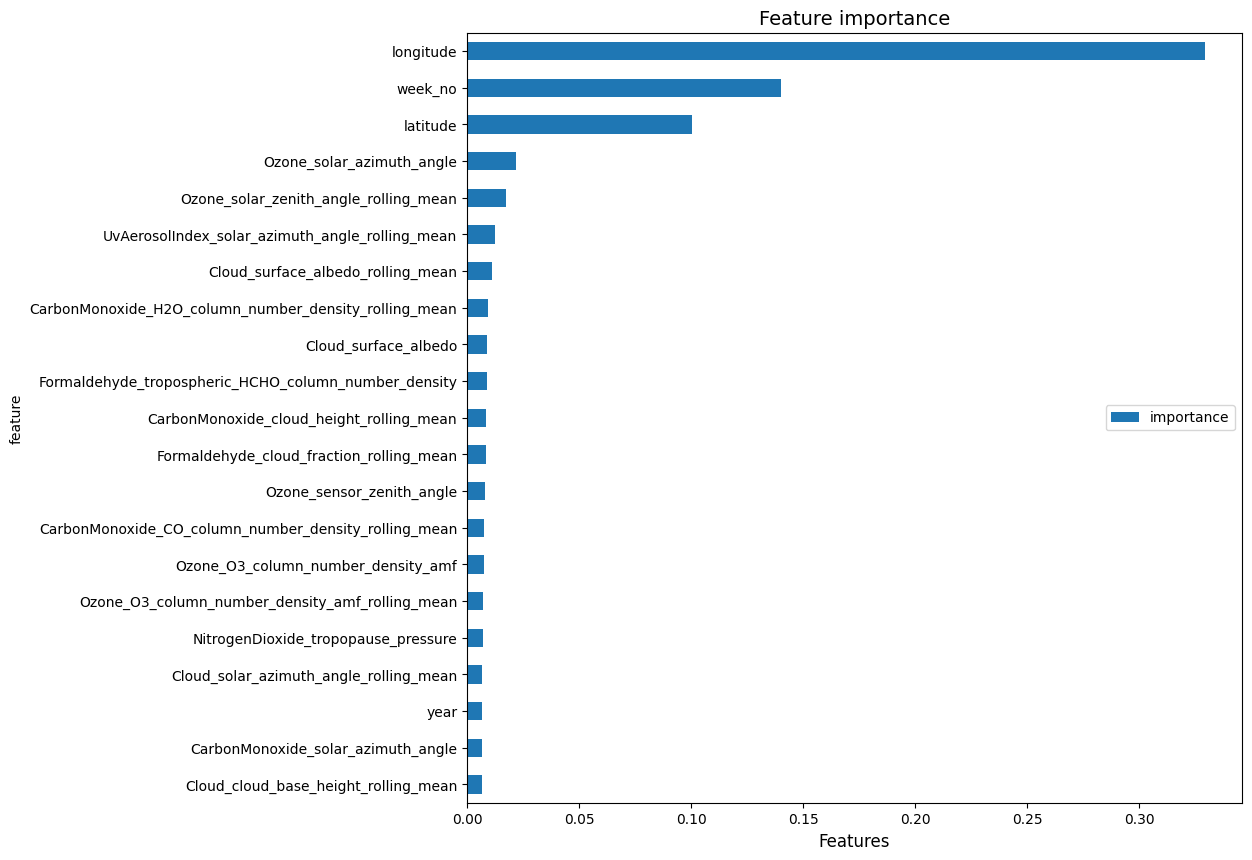

In [69]:
impo_df = pd.DataFrame({'feature': X.columns, 'importance': xgb_reg.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:21].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

In [ ]:
eval_df = X_test.copy()
eval_df["emission"] = y_test
eval_df["prediction"] = prediction
eval_df["error"] = abs(eval_df["prediction"] - eval_df["emission"])
eval_df = eval_df[["latitude", "longitude", "year", "week_no", "emission", "prediction", "error"]]
eval_df.sort_values(by = "error", ascending = False, inplace = True)
eval_df.head()